In [1]:
#import libraries
import csv
import sqlite3
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
#declare constants
floor_wage = 7.25
avg_wage = 9.51

In [3]:
#load csv rent data into Pandas DataFrame and return the DateFrame
#encoding error on UTF-8 required alternative encoding
#low memory parameter used
df = pd.read_csv('rent_data.csv', encoding='ISO-8859-1', low_memory=False)
df

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,101904,1,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,101907,1,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.263130,-86.210660,625,585,234,2560
3,101910,1,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,101913,1,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114
5,101916,1,Alabama,AL,Calhoun County,Anniston,Anniston city,City,place,36207,256,118209414,179314,33.673440,-85.810918,600,599,274,3901
6,101919,1,Alabama,AL,Limestone County,Ardmore,Ardmore,Town,place,35739,256,5289466,21830,34.987838,-86.829022,581,557,283,215
7,101922,1,Alabama,AL,Dale County,Ariton,Ariton,Town,place,36311,334,13182489,0,31.597772,-85.713061,581,539,357,45
8,101925,1,Alabama,AL,Clay County,Ashland,Ashland,Town,place,36251,256,18986275,85046,33.269892,-85.833706,433,411,237,476
9,101928,1,Alabama,AL,Escambia County,Atmore,Atmore city,City,place,36504,251,56596816,195366,31.127936,-87.457643,556,554,227,1109


In [4]:
#connect to the SQLite database
conn = sqlite3.connect('rent.db')

In [5]:
#pushes DataFrame to SQLite database
df.to_sql('rent_table', conn, if_exists='replace')

In [6]:
#runs SQL query to fetch data from SQLite database and loads it into a DataFrame
df_rent = pd.read_sql_query('SELECT State_ab AS state, AVG(Mean) AS rent_mean FROM rent_table GROUP BY State_ab ORDER BY rent_mean DESC', conn)


In [7]:
#calculates hours of work required to meet average rent at US Floor Wage and US Avg. Min Wage respectively...
#... and appends both as colmns in the DataFrame
df_rent['floor_hours'] = df_rent['rent_mean']/floor_wage
df_rent['avg_hours'] = df_rent['rent_mean']/avg_wage
df_rent

,state,rent_mean,floor_hours,avg_hours
0,DC,1546.015873,213.243569,162.567389
1,HI,1433.930636,197.783536,150.781350
2,CA,1402.559671,193.456506,147.482615
3,MD,1302.858757,179.704656,136.998818
4,CT,1280.534704,176.625476,134.651388
5,NJ,1280.031527,176.556073,134.598478
6,VA,1184.354144,163.359192,124.537765
7,NY,1164.968891,160.685364,122.499358
8,MA,1160.997253,160.137552,122.081730
9,FL,1100.209265,151.753002,115.689723


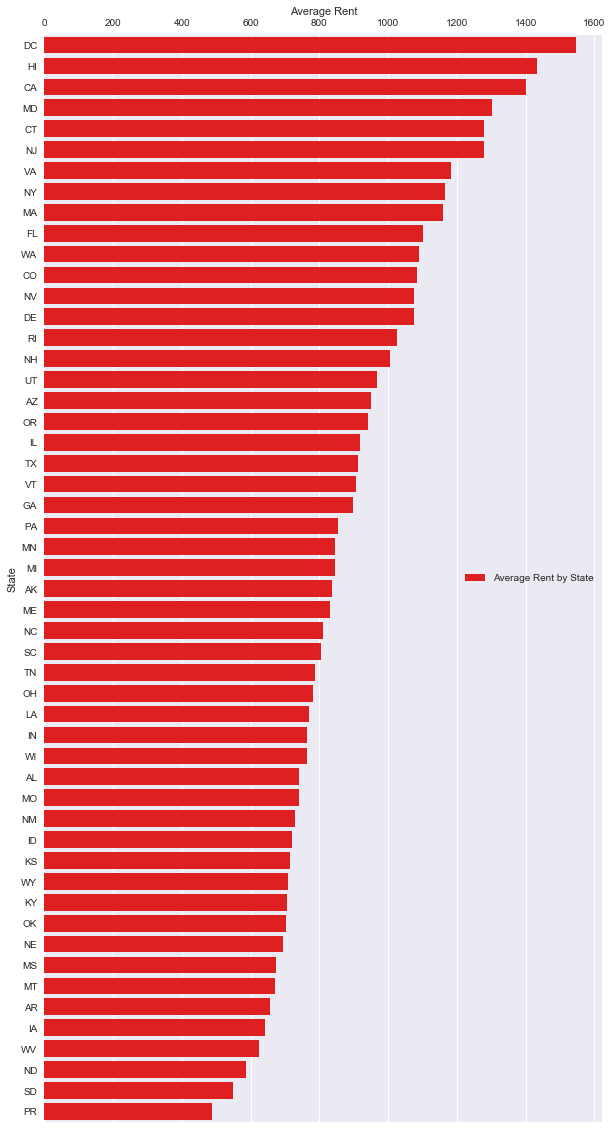

In [8]:
#Creates a subplot to allow two fields to be plotted on the same chart
f, ax = plt.subplots(figsize=(10,20))

#Creates bar chart to plot both data
sns.barplot(x='rent_mean', y='state', data=df_rent, color='r', label='Average Rent by State')

#Styles the axes
ax.set_xlabel('Average Rent')
ax.xaxis.set_label_position('top') 
ax.set_ylabel('State') 
ax.xaxis.tick_top()
ax.legend(loc='center right')
plt.show()

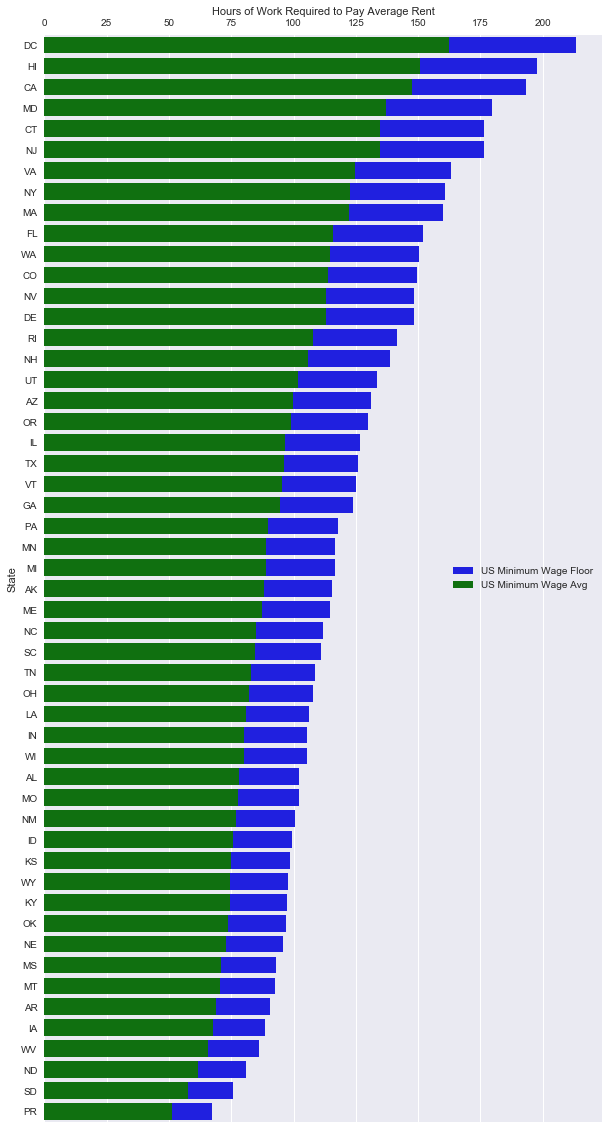

In [9]:
#Creates a subplot to allow two fields to be plotted on the same chart
f, ax = plt.subplots(figsize=(10,20))

#creates bar chart to plot both fields
sns.barplot(x='floor_hours', y='state', data=df_rent, color='b', label='US Minimum Wage Floor')
sns.barplot(x='avg_hours', y='state', data=df_rent, color='g', label='US Minimum Wage Avg')

#styles the axes and legend
ax.set_xlabel('Hours of Work Required to Pay Average Rent') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('State') 
ax.xaxis.tick_top()
ax.legend(loc='center right')
plt.show()